In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram

%matplotlib inline

In [2]:
statevec_simulator = q.Aer.get_backend("statevector_simulator")
qasm_sim = q.Aer.get_backend('qasm_simulator')

def do_job(circuit):
    job = q.execute(circuit, backend=statevec_simulator)
    result = job.result()
    statevec = result.get_statevector() # return the state vector in the Bloch Sphere
    
    n_qubits = circuit.n_qubits
    circuit.measure([i for i in range(n_qubits)], [i for i in range(n_qubits)])
    
    qasm_job = q.execute(circuit, backend=qasm_sim, shots=1024).result()
    counts = qasm_job.get_counts() # return the counts
    
    return statevec, counts

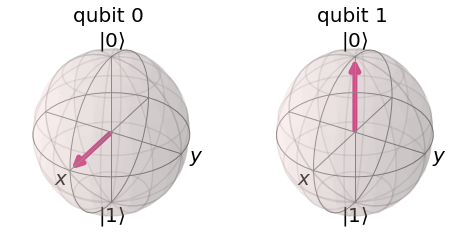

In [3]:
# example we seen before: hadamard gate
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0: |0> -> (|0> + |1>)/sqrt(2)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

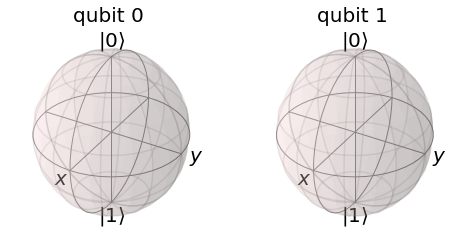

In [7]:
circuit = q.QuantumCircuit(2,2)  # 2 qubits, 2 classical bits 
circuit.h(0)  # hadamard gate on qubit0
circuit.cx(0,1)  # cnot entanglement: controlled not (control: 0 target: 1)
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)
# the vectors are in the origin, both entangled with each other. Final state: (|0>|0>+|1>|1>)/sqrt(2)

In [13]:
# the target qubit can also has 2 control bits, rather than 1 using ccx entanglement(controlled controlled or Toffoli gate)
circuit = q.QuantumCircuit(3,3)  # 3 qubits, 3 classical bits 
circuit.h(0) # (|0> + |1>)/sqrt(2)
circuit.h(1) # (|0> + |1>)/sqrt(2)
circuit.ccx(0,1,2) # only flip q2 when both q0 and q1 are 1
# (|0>|0>|0>+ |0>|1>|0>+ |1>|0>|0> + |1>|1>|1>)/2
circuit.draw()

┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤  │  
q_1: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_2: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  
 c_1: 0 ══════════
                  
 c_2: 0 ══════════

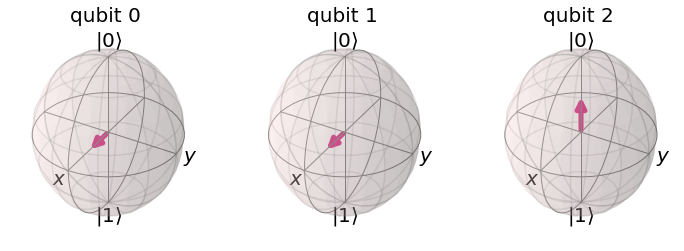

In [14]:
statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

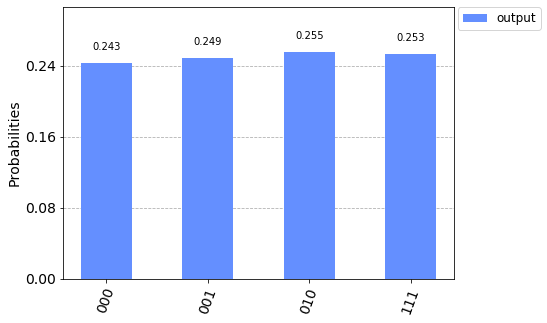

In [15]:
plot_histogram([counts], legend=['output'])

        ┌───┐     
q_0: |0>┤ H ├──■──
        ├───┤  │  
q_1: |0>┤ H ├──■──
        └───┘┌─┴─┐
q_2: |0>─────┤ X ├
             └───┘
 c_0: 0 ══════════
                  


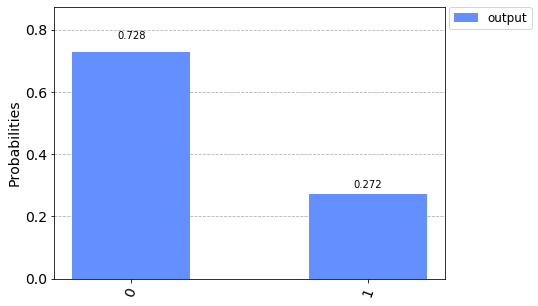

In [17]:
# only measure one of the qubits
circuit = q.QuantumCircuit(3,1)  # 3 qubits, only 1 classical bit
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
print(circuit.draw())

circuit.measure([2], [0])  # map qubit @ index 2, to classical bit @ index 0.
result = q.execute(circuit, backend=qasm_sim, shots=1024).result()

counts = result.get_counts()
plot_histogram([counts], legend=['output'])

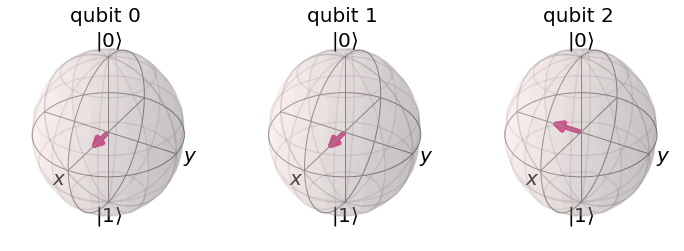

In [19]:
# rotate the state vector
import math

circuit = q.QuantumCircuit(3,3)  # even-sized registers again so we can use our function
circuit.h(0)  # hadamard
circuit.h(1)  # hadamard
circuit.ccx(0,1,2)  # controlled controlled not
# up until now the circuit is the same
circuit.rx(math.pi/2, 2) # rotate qubit 2 90 degree around x axis

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)

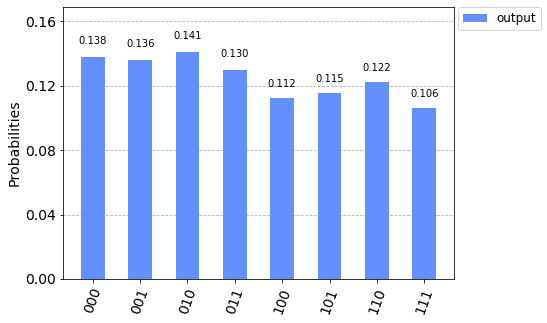

In [21]:
plot_histogram([counts], legend=['output']) # 8=2^3 output possibilities

        ┌───┐          
q_0: |0>┤ H ├──────────
        ├───┤          
q_1: |0>┤ H ├────■─────
        ├───┤┌───┴────┐
q_2: |0>┤ X ├┤ Rz(pi) ├
        └───┘└────────┘
 c_0: 0 ═══════════════
                       
 c_1: 0 ═══════════════
                       
 c_2: 0 ═══════════════
                       


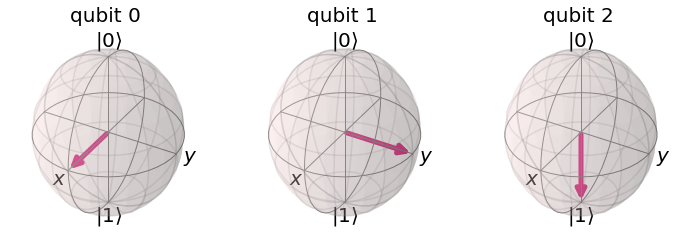

In [23]:
# controlled rotation (what??)

circuit = q.QuantumCircuit(3,3) 
circuit.h(0)  # hadamard
circuit.h(1)  
circuit.x(2) # not
circuit.crz(math.pi, 1, 2)  # theta, control, target: controlled rotation for z axis
#(|0>|1> - |1>|1>)/sqrt(2)
print(circuit.draw())

statevec, counts = do_job(circuit)
plot_bloch_multivector(statevec)